In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, classification_report
import math
import numpy as np

from yellowbrick.regressor import ResidualsPlot

##  Carrega arquivos

In [2]:
folder = "data-rodrigo/"

df = pd.DataFrame()

for file in os.listdir(folder):
    if file.endswith(".csv"):
        path = os.path.join(folder, file)
        df_buffer = pd.read_csv(path, sep="|")
        df = df.append(df_buffer)

df.reset_index(inplace=True,drop=True)
print(df.shape)
df.head()

(2500, 23)


,Bairro,Codigo_wimoveis,Endereco,Forma,Municipio,Site,Tipo,UF,URL,Dias_anuncio,...,vagas,quartos,suites,idade_do_imovel,suite,venda,condominio,iptu,latitude,longitude
0,\nSetor Habitacional Contagem\n,2942525335,"Condominio Vivendas Serrana, Setor Habitacion...",\nComprar\n,\nSobradinho\n,\nWimoveis\n,\nCasas\n,\nDistrito Federal\n,https://www.wimoveis.com.br/propriedades/casa-...,14,...,0.0,3.0,NaN,7,1.0,650000.0,NaN,NaN,-15.669039,-47.817472
1,\nGrande Colorado\n,2943693315,"CONDOMINIO JARDIM EUROPA II , Grande Colorado...",\nComprar\n,\nSobradinho\n,\nWimoveis\n,\nCasas\n,\nDistrito Federal\n,https://www.wimoveis.com.br/propriedades/excel...,[],...,2.0,4.0,NaN,10,1.0,680000.0,NaN,NaN,-15.668008,-47.848734
2,\nSobradinho\n,2943340362,"Setor Comercial Central , Sobradinho, Sobradinho",\nComprar\n,\nSobradinho\n,\nWimoveis\n,\nCasas\n,\nDistrito Federal\n,https://www.wimoveis.com.br/propriedades/quadr...,11,...,NaN,4.0,4.0,19,NaN,1500000.0,NaN,NaN,-15.651065,-47.790059
3,\nRegião Dos Lagos\n,2941341565,"CONDOMINIO RK X, Regiao Dos Lagos, Sobradinho",\nComprar\n,\nSobradinho\n,\nWimoveis\n,\nCasas\n,\nDistrito Federal\n,https://www.wimoveis.com.br/propriedades/casa-...,109,...,2.0,3.0,0.0,1,NaN,950000.0,NaN,NaN,-15.691065,-47.824731
4,\nAlto Da Boa Vista\n,2943419550,"condominio Alto da Boa Vista, Alto Da Boa Vis...",\nComprar\n,\nSobradinho\n,\nWimoveis\n,\nCasas\n,\nDistrito Federal\n,https://www.wimoveis.com.br/propriedades/casa-...,14,...,4.0,3.0,3.0,1,NaN,590000.0,400.0,NaN,-15.640650,-47.759264


In [3]:
df.dtypes

Bairro              object
Codigo_wimoveis     object
Endereco            object
Forma               object
Municipio           object
Site                object
Tipo                object
UF                  object
URL                 object
Dias_anuncio        object
area_total         float64
area_util          float64
banheiros          float64
vagas              float64
quartos            float64
suites             float64
idade_do_imovel     object
suite              float64
venda              float64
condominio         float64
iptu               float64
latitude           float64
longitude          float64
dtype: object

### Remove outlier do preço de venda

In [4]:
df.venda.describe()

count    2.455000e+03
mean     5.561819e+06
std      1.364241e+08
min      1.000000e+02
25%      4.500000e+05
50%      6.500000e+05
75%      9.950000e+05
max      6.299000e+09
Name: venda, dtype: float64

In [5]:
df = df.loc[df.venda < 65000000.0]
df.venda.describe()

count    2.448000e+03
mean     9.682457e+05
std      1.161218e+06
min      1.000000e+02
25%      4.500000e+05
50%      6.500000e+05
75%      9.900000e+05
max      2.131675e+07
Name: venda, dtype: float64

### Quantidade de valores nulos por coluna

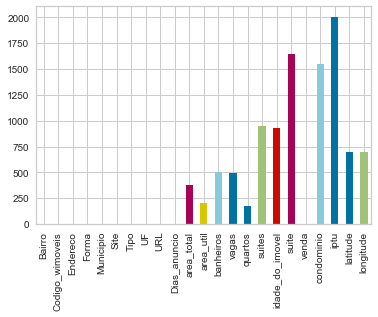

In [6]:
df.isna().sum().plot.bar()

In [7]:
df = df.dropna(subset=['venda','area_total','area_util'])
print("Shape:",df.shape)
df.isna().sum()

Shape: (1884, 23)


Bairro                0
Codigo_wimoveis       0
Endereco              0
Forma                 0
Municipio             0
Site                  0
Tipo                  0
UF                    0
URL                   0
Dias_anuncio          0
area_total            0
area_util             0
banheiros           337
vagas               337
quartos             105
suites              695
idade_do_imovel     635
suite              1282
venda                 0
condominio         1176
iptu               1496
latitude            433
longitude           433
dtype: int64

In [8]:
df.Bairro.value_counts()

\nGrande Colorado\n                          284
\nRegião Dos Lagos\n                         250
\nSobradinho\n                               238
\nSetor Habitacional Contagem\n              172
\nAlto Da Boa Vista\n                        156
\nAsa Norte\n                                 94
\nPark Way\n                                  80
\nLago Sul\n                                  78
\nNoroeste\n                                  74
\nSetor De Mansões De Sobradinho\n            57
\nAsa Sul\n                                   53
\nSetor Habitacional Jardim Botânico\n        50
\nSudoeste\n                                  50
\nPark Sul\n                                  40
\nLago Norte\n                                36
\nSetor Oeste\n                               30
\nCentro\n                                    29
\nNova Colina\n                               27
\nCondomínio Império dos Nobres\n             19
\nSobradinho Ii\n                             18
\nSerra Azul\n      

In [9]:
df.Bairro = df.Bairro.str.replace("\n","")

### Remove datapoints de bairros com menos de 18 imóveis (pega so 20 +)

In [10]:
df.Bairro.value_counts()[20:]

Setor De Industrias                      5
Núcleo Rural Lago Oeste                  5
Serra Azul                               5
Setor Economico De Sobradinho            3
Condomínio Mansões Sobradinho            2
Octogonal                                2
Setor De Clubes Esportivos Sul           2
Condomínio Vale dos Pinheiros            2
Vale Das Acacias                         2
Setor Habitacional Tororo                2
Setor Bancario Sul                       2
Estancias Vila Rica                      2
Setores Complementares                   1
Setor De Clubes Esportivos Norte         1
Vila Rabelo I                            1
Taquari                                  1
Setor Hoteleiro Sul                      1
Setor Habitacional Jardins Mangueiral    1
Centro de Atividades                     1
Setor de Hotéis e Turismo Norte          1
Setor de Habitações Individuais Norte    1
Superquadra Sudoeste                     1
Zona Rural                               1
Setor de Mú

In [11]:
bairros_reject = df.Bairro.value_counts()[20:].index.values
bairros_reject

array(['Setor De Industrias', 'Núcleo Rural Lago Oeste', 'Serra Azul',
       'Setor Economico De Sobradinho', 'Condomínio Mansões Sobradinho',
       'Octogonal', 'Setor De Clubes Esportivos Sul',
       'Condomínio Vale dos Pinheiros', 'Vale Das Acacias',
       'Setor Habitacional Tororo', 'Setor Bancario Sul',
       'Estancias Vila Rica', 'Setores Complementares',
       'Setor De Clubes Esportivos Norte', 'Vila Rabelo I', 'Taquari',
       'Setor Hoteleiro Sul', 'Setor Habitacional Jardins Mangueiral',
       'Centro de Atividades', 'Setor de Hotéis e Turismo Norte',
       'Setor de Habitações Individuais Norte', 'Superquadra Sudoeste',
       'Zona Rural', 'Setor de Múltiplas Atividades Sul', 'Alphaville',
       'Setor Habit. Fercal', 'Setor Da Industria E Abastecimento'],
      dtype=object)

In [12]:
df = df[~df['Bairro'].isin(bairros_reject)]
print(df.shape)
df.head()

(1835, 23)


,Bairro,Codigo_wimoveis,Endereco,Forma,Municipio,Site,Tipo,UF,URL,Dias_anuncio,...,vagas,quartos,suites,idade_do_imovel,suite,venda,condominio,iptu,latitude,longitude
0,Setor Habitacional Contagem,2942525335,"Condominio Vivendas Serrana, Setor Habitacion...",\nComprar\n,\nSobradinho\n,\nWimoveis\n,\nCasas\n,\nDistrito Federal\n,https://www.wimoveis.com.br/propriedades/casa-...,14,...,0.0,3.0,NaN,7,1.0,650000.0,NaN,NaN,-15.669039,-47.817472
3,Região Dos Lagos,2941341565,"CONDOMINIO RK X, Regiao Dos Lagos, Sobradinho",\nComprar\n,\nSobradinho\n,\nWimoveis\n,\nCasas\n,\nDistrito Federal\n,https://www.wimoveis.com.br/propriedades/casa-...,109,...,2.0,3.0,0.0,1,NaN,950000.0,NaN,NaN,-15.691065,-47.824731
4,Alto Da Boa Vista,2943419550,"condominio Alto da Boa Vista, Alto Da Boa Vis...",\nComprar\n,\nSobradinho\n,\nWimoveis\n,\nCasas\n,\nDistrito Federal\n,https://www.wimoveis.com.br/propriedades/casa-...,14,...,4.0,3.0,3.0,1,NaN,590000.0,400.0,NaN,-15.640650,-47.759264
5,Setor Habitacional Contagem,2930933252,"CONDOMINIO VIVENDAS ALVORADA I , Setor Habita...",\nComprar\n,\nSobradinho\n,\nWimoveis\n,\nCasas\n,\nDistrito Federal\n,https://www.wimoveis.com.br/propriedades/casa-...,89,...,NaN,4.0,4.0,10,NaN,670000.0,650.0,NaN,-15.653887,-47.843234
6,Sobradinho,2941054134,"Quadra conjunto d, Sobradinho, Sobradinho",\nComprar\n,\nSobradinho\n,\nWimoveis\n,\nCasas\n,\nDistrito Federal\n,https://www.wimoveis.com.br/propriedades/a-ven...,14,...,4.0,4.0,2.0,15,NaN,530000.0,NaN,NaN,-15.655362,-47.791509


In [13]:
df.Tipo.value_counts()

\nCasas\n           1492
\nApartamentos\n     304
\nComerciais\n        20
\nTerrenos\n          17
\nRurais\n             2
Name: Tipo, dtype: int64

In [14]:
df.Tipo = df.Tipo.str.replace("\n","")
df = df[df.Tipo != "Rurais"]
df.Tipo.value_counts()

Casas           1492
Apartamentos     304
Comerciais        20
Terrenos          17
Name: Tipo, dtype: int64

In [15]:
df.quartos = df.quartos.fillna(df.quartos.median())

In [16]:
df_regression = df[['Bairro', 'area_total', 'area_util', 'Tipo', 'quartos','venda']]
print(df_regression.shape)
df_regression.head()

(1833, 6)


,Bairro,area_total,area_util,Tipo,quartos,venda
0,Setor Habitacional Contagem,600.0,227.0,Casas,3.0,650000.0
3,Região Dos Lagos,504.0,360.0,Casas,3.0,950000.0
4,Alto Da Boa Vista,504.0,201.0,Casas,3.0,590000.0
5,Setor Habitacional Contagem,500.0,380.0,Casas,4.0,670000.0
6,Sobradinho,250.0,250.0,Casas,4.0,530000.0


In [17]:
df_regression.isna().sum()

Bairro        0
area_total    0
area_util     0
Tipo          0
quartos       0
venda         0
dtype: int64

In [18]:
one_hot = pd.get_dummies(df_regression['Tipo'],prefix="tipo")
df_regression = df_regression.join(one_hot)
df_regression.shape

(1833, 10)

In [19]:
df_regression.head()

,Bairro,area_total,area_util,Tipo,quartos,venda,tipo_Apartamentos,tipo_Casas,tipo_Comerciais,tipo_Terrenos
0,Setor Habitacional Contagem,600.0,227.0,Casas,3.0,650000.0,0,1,0,0
3,Região Dos Lagos,504.0,360.0,Casas,3.0,950000.0,0,1,0,0
4,Alto Da Boa Vista,504.0,201.0,Casas,3.0,590000.0,0,1,0,0
5,Setor Habitacional Contagem,500.0,380.0,Casas,4.0,670000.0,0,1,0,0
6,Sobradinho,250.0,250.0,Casas,4.0,530000.0,0,1,0,0


In [20]:
one_hot = pd.get_dummies(df_regression['Bairro'], prefix="bairro")
df_regression = df_regression.join(one_hot)

df_regression = df_regression.drop(['Tipo', 'Bairro'], axis=1)

df_regression.shape
df_regression.head()

,area_total,area_util,quartos,venda,tipo_Apartamentos,tipo_Casas,tipo_Comerciais,tipo_Terrenos,bairro_Alto Da Boa Vista,bairro_Asa Norte,...,bairro_Park Sul,bairro_Park Way,bairro_Região Dos Lagos,bairro_Setor De Mansões De Sobradinho,bairro_Setor Habitacional Contagem,bairro_Setor Habitacional Jardim Botânico,bairro_Setor Oeste,bairro_Sobradinho,bairro_Sobradinho Ii,bairro_Sudoeste
0,600.0,227.0,3.0,650000.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,504.0,360.0,3.0,950000.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,504.0,201.0,3.0,590000.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,500.0,380.0,4.0,670000.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,250.0,250.0,4.0,530000.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
X = df_regression.drop(['venda'],axis=1)
y = df_regression['venda']
X.shape, y.shape

((1833, 27), (1833,))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1649, 27), (184, 27), (1649,), (184,))

In [23]:
reg = RandomForestRegressor(n_estimators=100) 
reg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [24]:
reg.fit(X_train, y_train)
train_predict = reg.predict(X_train)
test_predict = reg.predict(X_test)

In [25]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, test_predict))

print("Root Mean squared error: %.2f"
      % math.sqrt(mean_squared_error(y_test, test_predict)))

print('R2 score: %.2f' % r2_score(y_test, test_predict))

Mean squared error: 191475665613.88
Root Mean squared error: 437579.32
R2 score: 0.80


Feature ranking:
1. feature bairro_Lago Sul (0.348384)
2. feature area_util (0.346707)
3. feature quartos (0.082781)
4. feature tipo_Apartamentos (0.081596)
5. feature area_total (0.072572)
6. feature tipo_Casas (0.011840)
7. feature bairro_Park Way (0.011560)
8. feature bairro_Lago Norte (0.009761)
9. feature bairro_Setor Habitacional Jardim Botânico (0.009099)
10. feature bairro_Região Dos Lagos (0.005736)
11. feature tipo_Terrenos (0.004342)
12. feature bairro_Grande Colorado (0.002976)
13. feature bairro_Noroeste (0.002530)
14. feature bairro_Park Sul (0.002155)
15. feature bairro_Asa Sul (0.002127)
16. feature bairro_Setor De Mansões De Sobradinho (0.001408)
17. feature bairro_Asa Norte (0.000987)
18. feature bairro_Centro (0.000773)
19. feature bairro_Sobradinho (0.000685)
20. feature bairro_Sudoeste (0.000552)
21. feature bairro_Alto Da Boa Vista (0.000386)
22. feature bairro_Setor Habitacional Contagem (0.000378)
23. feature bairro_Setor Oeste (0.000251)
24. feature tipo_Comerc

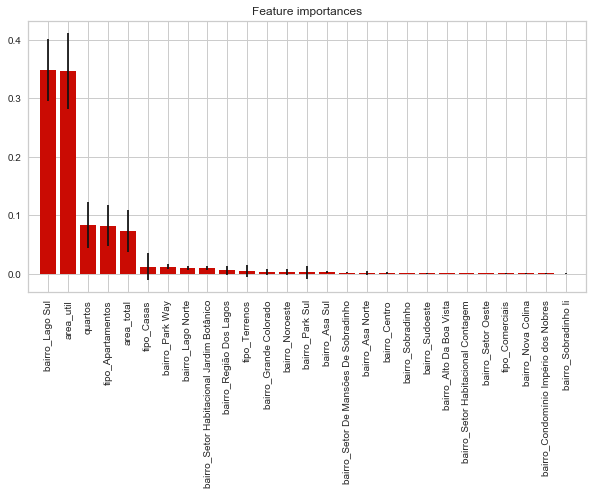

In [26]:
 plt.rcParams['figure.figsize'] = [10, 5]
importances = reg.feature_importances_
std = np.std([tree.feature_importances_ for tree in reg.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

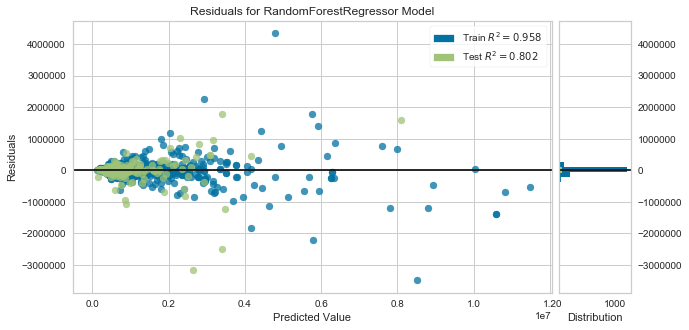

In [28]:
reg2 = RandomForestRegressor(n_estimators=100) 

visualizer = ResidualsPlot(reg2)
visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data